# Homework 3

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

## Task 1

In [3]:
def d(p, a, b):
    return np.exp(-1*a*p - b)
def TC(q):
    return 2 + 9*q + 0.1*np.power(q, 2)
def profit(p, a, b):
    quantity = d(p, a, b)
    return quantity*p - TC(quantity)

### 1.1

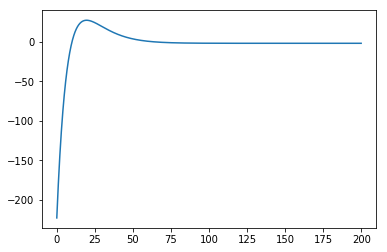

In [4]:
ps = np.arange(0,200, 0.1)
profits = profit(ps, 0.1, -3)

plt.plot(ps, profits)

### 1.2

In [5]:
max_p = ps[np.argmax(profits)]
print(f"Optimal price = {max_p}")
print(f"Profit = {profit(max_p, 0.1, -3)}")

Optimal price = 19.6
Profit = 27.189253460696897


### 1.3

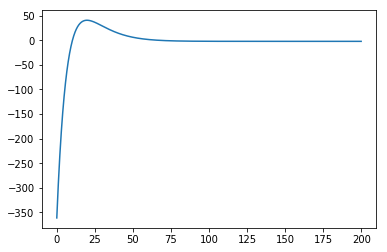

Optimal price = 19.8
Profit = 40.96932420100043 - 10 = 30.969324201000433


In [6]:
ps = np.arange(0,200, 0.1)
profits = profit(ps, 0.1, -3.4)

plt.plot(ps, profits)
plt.show()

max_p = ps[np.argmax(profits)]
print(f"Optimal price = {max_p}")
print(f"Profit = {profit(max_p, 0.1, -3.4)} - 10 = {profit(max_p, 0.1, -3.4) - 10}")

Advertising campaign increase profit so it is expedient.

## Task 2

### 1

In [7]:
from scipy.optimize import curve_fit

prices = np.array([25, 20, 15,  13, 10])
sales  = np.array([2,  3,  5.2, 6,  8])

def demand(x, a, b):
    return np.exp(-1*a*x - b)

a,b = curve_fit(demand, prices, sales)[0]

print(f"A = {a}, B = {b}")

A = 0.09373065550147375, B = -3.0195444856202194


### 2

In [8]:
prices_2 = np.array([25, 22, 18, 15, 11])
sales_2  = np.array([2,  3,  5,  7,  8])

a_2,b_2 = curve_fit(demand, prices_2, sales_2)[0]

print(f"A = {a_2}, B = {b_2}")

A = 0.08552633911849611, B = -3.0848268264700325


### Optimal prices and profits for 1 and 2

In [9]:
from scipy.optimize import minimize_scalar

def TC(q):
    return 3 + 2.5 * q
def profit(p, a, b):
    q = demand(p, a, b)
    return q * p - TC(q)

def loss(x):
    return -1 * profit(x, a, b)
def loss2(x):
    return -1 * profit(x, a_2, b_2)

minimization_1 = minimize_scalar(loss)
print(minimization_1)

print("----")
minimization_2 = minimize_scalar(loss2)
print(minimization_2)

     fun: -60.59582500443772
    nfev: 18
     nit: 10
 success: True
       x: 13.168868213759035
----
     fun: -72.93987200208392
    nfev: 18
     nit: 10
 success: True
       x: 14.192304614964502


-----
Optimal price for 1st table is 13.16 and for 2nd is 14.19

In [10]:
profit_1 = profit(minimization_1['x'], a, b)
profit_2 = profit(minimization_2['x'], a_2, b_2)
print(f"Profit for 1 = {profit_1}")
print(f"Profit for 2 = {profit_2}")

Profit for 1 = 60.59582500443772
Profit for 2 = 72.93987200208392


### Combine 1 and 2 

In [11]:
def loss_1_and_2(x):
    return loss(x) + loss2(x)

minimization_1_and_2 = minimize_scalar(loss_1_and_2)
print(minimization_1_and_2)
profit_1_and_2 = profit(minimization_1_and_2['x'], a_2, b_2)
print(f"Profit for 1 and 2 = {profit_1_and_2}")

     fun: -133.39022678636098
    nfev: 18
     nit: 10
 success: True
       x: 13.702602771056915
Profit for 1 and 2 = 72.87137836497533


---
Optimal price = 13.70 and profit = 72.87

### Conclusion

Profit would be bigger in case we use both tables. Because as we see in combined model with same price 13 we have bigger profit 72.87.

## Task 3

In [12]:
print("       Left Middle Right  ")
print("Up     1;1  2;3    0;2               ")
print("Down   0;3  3;1    2;4               ")

       Left Middle Right  
Up     1;1  2;3    0;2               
Down   0;3  3;1    2;4               


Find balance in above game.

1) Left column is winning only for 2nd player. We can ignore it
2) UP row is winning only for 2nd player as well.
3) While 1st player choose Down 2nd player would prefer Right because it'd has a max profit for him

So my balance game is: 1st player choose Down and 2nd Right.

### Task 4

In [13]:
print("             |   Гонорар $20    |   Гонорар $25   |")
print("________________________________________________")
print("Гонорар $20   |   $100; $100    |   $150; $50    |")
print("Гонорар $25   |   $50; $150     |   $85; $85     |")

             |   Гонорар $20    |   Гонорар $25   |
________________________________________________
Гонорар $20   |   $100; $100    |   $150; $50    |
Гонорар $25   |   $50; $150     |   $85; $85     |


Nash equilibrium in this game would be to choose $25 for every company.

That's because doesn't matter which decision made another company, the best decision for your would be choose $25 for max profit. 

### Task 5


$ Q_a = 100 - p_a + 0.5p_b $ AND $ Q_b = 100 - p_b + 0.5p_a $

$ p_a = 100 + 0.5p_b - Q_a = 100 + 0.5*(100 - Q_b + 0.5p_a) - Q_a= 200 - \dfrac{2}{3}Q_b - \dfrac{4}{3}Q_a$

$ p_b = 200 - \dfrac{2}{3}Q_a - \dfrac{4}{3}Q_b$


$ TC_a = с(Q_a) = 600 + 10 \times Q_a + 0.25 \times Q^2_a$

$ TC_b = с(Q_a) = 25Q_b+ 0.5Q_b^2$

Company A would maximize profit using fixed B policy:

$ Profit_a = p_a \times Q_a - TC_a = (200 - \dfrac{2}{3}Q_b - \dfrac{4}{3}Q_a)\times Q_a - (600 + 10 \times Q_a + 0.25 \times Q^2_a)$

$ Profit_a = -600 + 190\times Q_a - \dfrac{19}{12}Q^2_a - \dfrac{2}{3}Q_aQ_b$


Reaction A on B strategy:

$ MP_A = 190 - \dfrac{19}{12}Q_a - \dfrac{2}{3}Q_b $


$190 - \dfrac{19}{12}Q_a - \dfrac{2}{3}Q_b  = 0$

$Q_a = 60 - \dfrac{4}{19}Q_b$

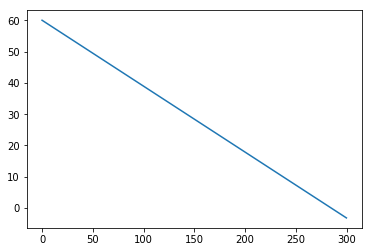

In [15]:
B = np.arange(0,300, 0.1)

A = 60 - (4/19) * B

plt.plot(B,A)

Company B maximize profit knowing that A would react on their strategy:

$ Profit_b = p_b \times Q_b - TC_b = (200 - \dfrac{2}{3}Q_a - \dfrac{4}{3}Q_b)\times Q_b - (25Q_b+ 0.5Q_b^2)$

$ Profit_b = 135Q_b - \dfrac{93}{114}Q^2_b$


$MP_b = 135 - \dfrac{93}{57}Q_b$

$Q_b = \dfrac{135 \times 57}{93}$

In [18]:
Q_b = (135*57)/93
Q_a = 60 - (4/19) * Q_b

p_a = 200 - (2/3)*Q_b - (4/3)*Q_a
p_b = 200 - (2/3)*Q_a - (4/3)*Q_b

Profit_a = -600 + 190 * Q_a - (19/12)*Q_a**2- (2/3)*Q_a*Q_b
Profit_b = 135*Q_b  - (93/114)*Q_b**2

print(f"Optimal Q_a = {Q_a}      |     Q_b = {Q_b}")
print(f"P_a         = {p_a}      |     P_b = {p_b}")
print(f"Profit_a    = {Profit_a} | Profit_b = {Profit_b}")

Optimal Q_a = 42.58064516129032      |     Q_b = 82.74193548387096
P_a         = 88.06451612903227      |     P_b = 61.29032258064518
Profit_a    = 2270.7596253902198 | Profit_b = 5585.080645161291


## Task 6

Company A maximize profit on fixed strategy of b:

$Profit_a = p_a \times Q_a - TC_a = p_a \times (100 - p_a + 0.5p_b) - (600 + 10 \times Q_a + 0.25 \times Q^2_a)$

$Profit_a = 100p_a - p^2_a + 0.5p_a p_b - 600 - 10\times(100 - p_a + 0.5p_b) - 0.25\times(100 - p_a + 0.5p_b)^2$

$MP_a = 100 - 2p_a + 0.5p_b - 10 - 0.25\times(2p_a - p_b - 200)^2 = 160 - \dfrac{5}{4}p_a+ \dfrac{3}{4}p_b$ 

---

$Profit_b = p_b \times Q_b - TC_b = p_b \times (100 - p_b + 0.5p_a) - ( 25Q_b+ 0.5Q_b^2 )$

$Profit_b = 100p_b - p_b^2 + 0.5p_bp_a - 25(100 - p_b + 0.5p_a) - 0.5(100 + 0.5p_a - p_b)^2$

$MP_b = 100 - 2p_b + 0.5p_a - 25 - 0.5(200 + p_a - 2p_b)^2 = 225 - 3p_b + p_a$


Solve linear equation where MP_a = 0 and MP_b = 0.

$P_a = 206.25$ AND $P_b = 143.75$

In [22]:
p_a = 206.25
p_b = 143.75

Q_a = 100 - p_a + 0.5*p_b
Q_b = 100 - p_b + 0.5*p_a

TC_a = 600 + 10 * Q_a + 0.25 * Q_a**2
TC_b = 25*Q_b+ 0.5*Q_b**2

Profit_a = p_a*Q_a - TC_a
Profit_b = p_b*Q_b - TC_b

print(f"price A = {p_a}, price B = {p_b}")
print(f"Optimals: Q_a = {Q_a}, Q_b = {Q_b}")
print(f"Profit_a = {Profit_a}, Profit_b = {Profit_b}")

price A = 206.25, price B = 143.75
Optimals: Q_a = -34.375, Q_b = 59.375
Profit_a = -7641.50390625, Profit_b = 5288.0859375


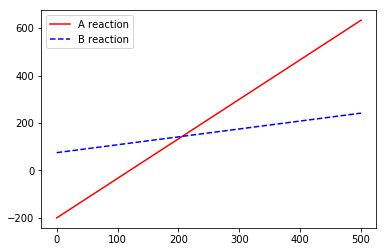

In [26]:
prices = np.arange(0,500, 0.1)

reaction_a = 5*prices - 600
reaction_a = reaction_a / 3

reaction_b = prices + 225
reaction_b = reaction_b / 3

plt.plot(prices, reaction_a, "r-",  label="A reaction")
plt.plot(prices, reaction_b, "b--", label="B reaction")

plt.legend()